# K-Nearest Neighbors (KNN)

## Bibliotecas

In [1]:
# !pip install mlxtend

In [2]:
# Bibliotecas de manipualção e visualização de dados
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.plotting import plot_decision_regions

# Classes do modelo de aprendizado
from sklearn.neighbors import KNeighborsClassifier

# Funções de avaliação dos modelos
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

---

## Inspeção dos dados

In [3]:
dataset = pd.read_csv("https://raw.githubusercontent.com/cynthiamaia/Monitoria-DeepLearning-CIN-AI/main/Datasets/Iris.csv")

In [4]:
# Inspeção dos dados

dataset.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


**Dataset Iris**

<img src="https://miro.medium.com/v2/resize:fit:1000/1*nfK3vGZkTa4GrO7yWpcS-Q.png" alt="Iris" width="600"/>

In [5]:
# Verificando as colunas

dataset.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [6]:
# Quais as classes desse dataset?

dataset['Species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [7]:
# Quantas classes existem nesse dataset?

dataset['Species'].nunique()

3

In [8]:
# Quantas instâncias e colunas temos no dataset?

dataset.shape

(150, 5)

In [9]:
# Qual o numero de instâncias por classe?

dataset['Species'].value_counts()

Species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

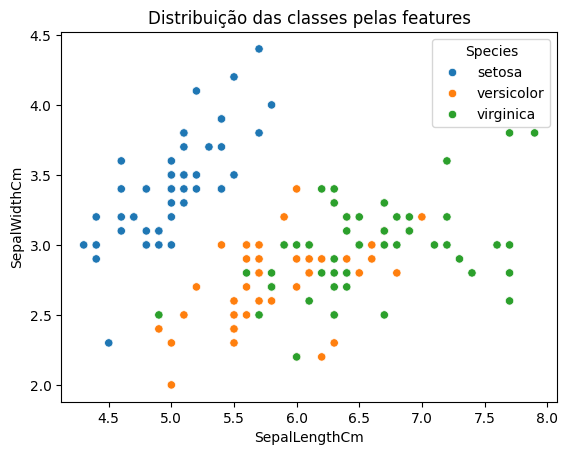

In [10]:
# Distribuição das classes pelas features SepalLengthCm e SepalWidthCm

plt.title('Distribuição das classes pelas features')
sns.scatterplot(data=dataset, x='SepalLengthCm', y='SepalWidthCm', hue='Species')
plt.show()

In [11]:
# Mapeando os valores da classe para inteiro (para fins de visualização da região de decisão)

dataset['Species'] = pd.factorize(dataset['Species'])[0]

# Setosa - 0
# Versicolor - 1
# Virginica - 2

dataset['Species'].unique()

array([0, 1, 2])

---

## Separação do conjunto de dados 

In [12]:
# Vamos utilizar somente duas features SepalLengthCm e SepalWidthCm

# loc - (rotulos) e iloc- (indices)

X = dataset.loc[:,["SepalLengthCm", "SepalWidthCm"]] 
y = dataset.loc[:,["Species"]]

# Separando o conjunto de dados em treinamento e teste

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)

---

## Treinamento do modelo

In [13]:
# vamos criar um classificador kNN com k=5

model = KNeighborsClassifier()
model.fit(X_train, y_train)

# E verificar a sua performance no dataset de teste: 

print(classification_report(y_test, model.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      0.93      0.97        15
           1       0.75      0.60      0.67        15
           2       0.68      0.87      0.76        15

    accuracy                           0.80        45
   macro avg       0.81      0.80      0.80        45
weighted avg       0.81      0.80      0.80        45



**Métricas**

*   **Precision** - $\frac{tp}{(tp + fp)}$
  
*   **Recall** - $\frac{tp}{(tp + fn)}$
  
*   **F1-score** - $2 * \frac{(precision * recall)}{(precision + recall)}$
  
*   **Accuracy** - $\frac{C}{T}$
  
*   **Macro avg** - Calcula as métricas para cada rótulo e encontra a sua média não ponderada.
  
*   **Weighted avg** - Calcula as métricas para cada rótulo e encontra a sua média ponderada pelo suporte (o número de instâncias verdadeiras para cada rótulo).


**tp** - verdadeiros positivos  
**fp** - falsos positivos  
**fn** - falsos negativos  
**C** - Número de predições corretas  
**T** - Número total de predições.

---

## Região de decisão

In [14]:
def show_decision_region(X, y, model):
    feature_0 = X.columns[0]
    feature_1 = X.columns[1]

    plot_decision_regions(np.array([X[feature_0].values,
                                    X[feature_1].values]).T,
                                    y.values.flatten(), model)
    """Exemplo -> cria uma lista com esses dois arrays
        [
    [5.1, 4.9, 4.7, ...],  # valores da primeira feature
    [3.5, 3.0, 3.2, ...]   # valores da segunda feature
    ]
    Tranforma em uma matriz 2D
        [
    [5.1, 3.5],
    [4.9, 3.0],
    [4.7, 3.2],
    ...
    ]
    """
    plt.xlabel(feature_0)
    plt.ylabel(feature_1)

    plt.title(model.__class__.__name__ + " k = " + str(model.n_neighbors))
    plt.show()

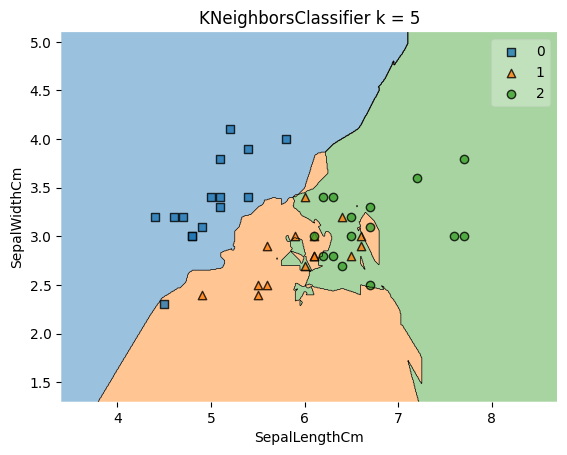

In [15]:
# Região de decisão com o tamanho da vizinhança para o kNN

show_decision_region(X_test, y_test, model)

---

## Análise dos parâmetros

### Tamanho da vizinhança

n_neighbors <= número de exemplos  e n_neighbors >= 1

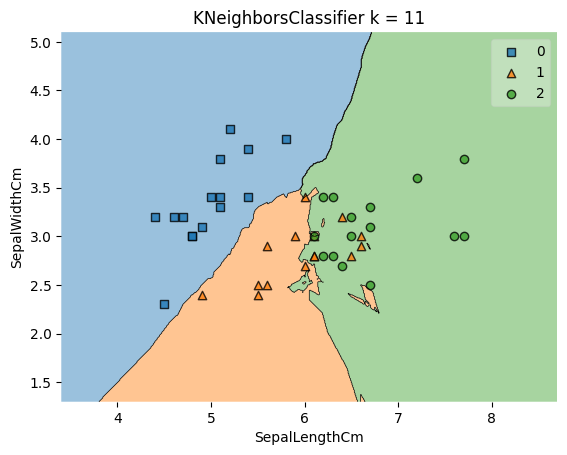

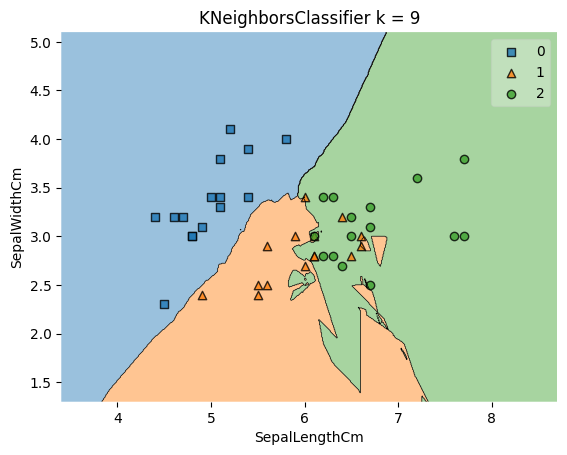

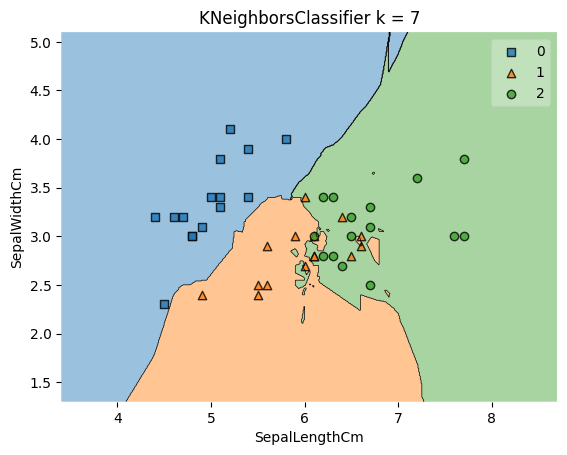

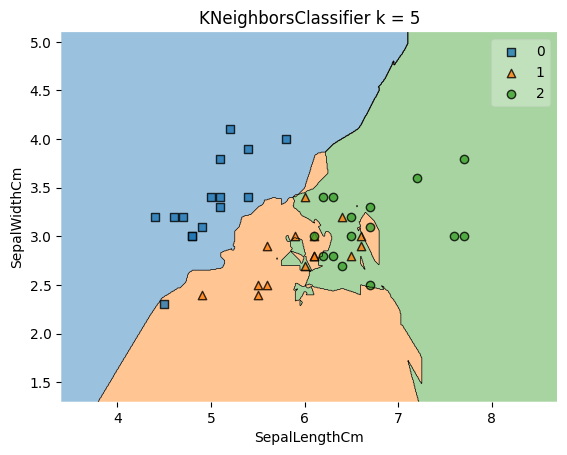

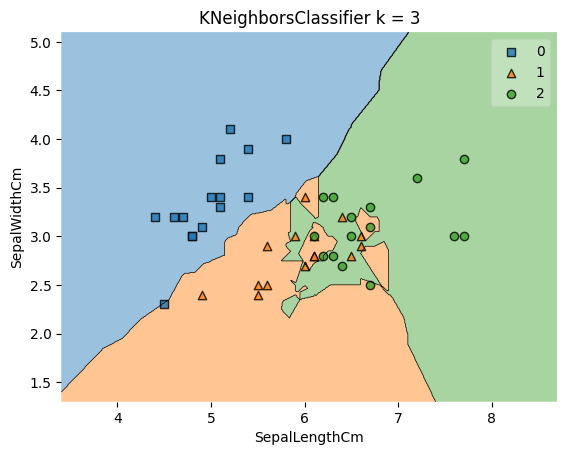

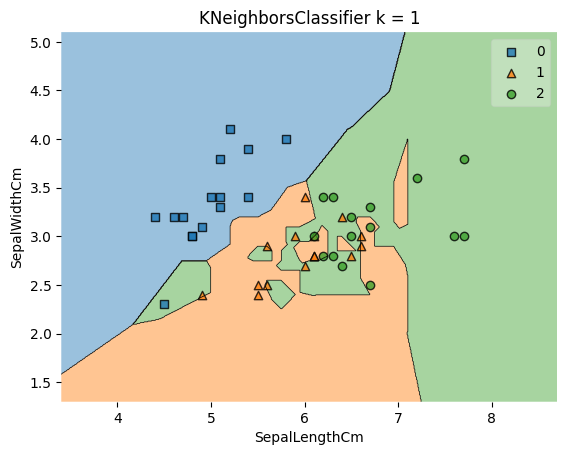

In [16]:
for k in [11, 9, 7, 5, 3, 1]:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)

    # Performance no dataset de teste:
    
    show_decision_region(X_test, y_test, model)

### Medida de distância

Também podemos mudar a métrica utilizada para calcular a distância entre as amostras.

O hiperparâmetro _metric_ pode assumir dois tipos diferentes, uma _string_ ou uma função. Caso o valor seja uma _string_, as possíveis funções de distâncias estão presentes [aqui](https://scikit-learn.org/0.24/modules/generated/sklearn.neighbors.DistanceMetric.html). Entretanto, você também pode criar uma função que calcula a distância entre métricas.

Vamos definir duas distâncias diferentes, a distância Euclidiana e a distância Manhattan:

- Manhattan: $D_M(x, y) = \sum_{i=1}^{d}|x_i-y_i|$

- Euclidiana: $D(x, y) = \sqrt{\sum_{i=1}^{d}(x_i-y_i)^2}$

In [17]:
# Vamos implementar a distância manhattan com pesos diferentes para cada uma das features
# OBS: Nem todas as features têm a mesma relevância para o problema.

def manhattan_custom_distance(x, y, weights=np.array([2, 1])):
    return (abs(x - y)*weights).sum() # Somamos a diferença absoluta em cada dimensão (feature) para medir a distância total

"""A primeira feature tem peso 2

A segunda feature tem peso 1"""

'A primeira feature tem peso 2\n\nA segunda feature tem peso 1'

--------------------
euclidean
              precision    recall  f1-score   support

           0       1.00      0.93      0.97        15
           1       0.75      0.60      0.67        15
           2       0.68      0.87      0.76        15

    accuracy                           0.80        45
   macro avg       0.81      0.80      0.80        45
weighted avg       0.81      0.80      0.80        45



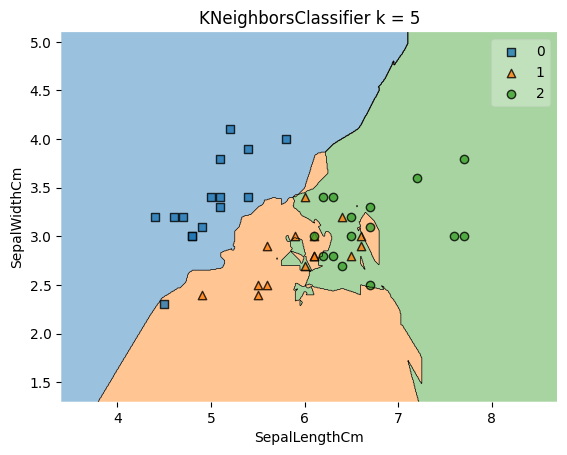

--------------------
manhattan
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.64      0.60      0.62        15
           2       0.62      0.67      0.65        15

    accuracy                           0.76        45
   macro avg       0.76      0.76      0.76        45
weighted avg       0.76      0.76      0.76        45



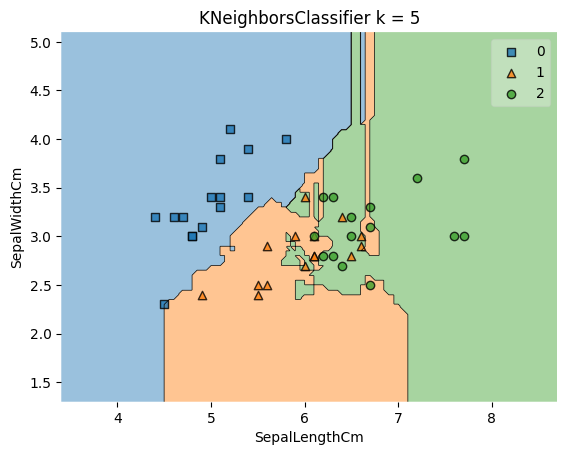

--------------------
<function manhattan_custom_distance at 0x716db60ceb60>
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.71      0.67      0.69        15
           2       0.69      0.73      0.71        15

    accuracy                           0.80        45
   macro avg       0.80      0.80      0.80        45
weighted avg       0.80      0.80      0.80        45



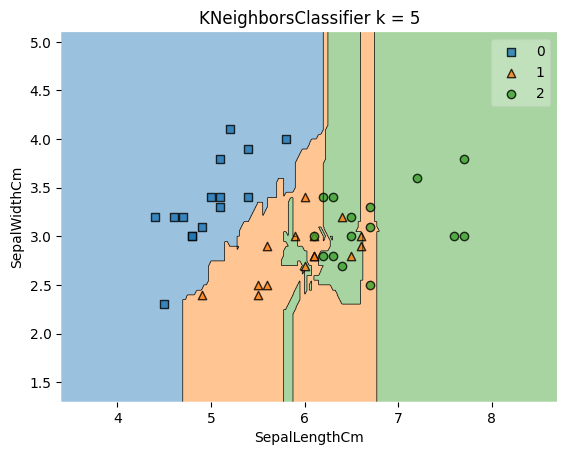

In [18]:
for m in ["euclidean", "manhattan", manhattan_custom_distance]:
    print("-"*20)
    print(str(m))

    model = KNeighborsClassifier(n_neighbors=5, metric=m)
    model.fit(X_train, y_train)

    # Performance no dataset de test
    print(classification_report(y_test, model.predict(X_test)))

    show_decision_region(X_test, y_test, model)